In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
%matplotlib inline
from scipy import stats

In [8]:
data = pd.read_csv("bank_marketing_part1_Data.csv")
data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [9]:
data.tail()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


In [1]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     \ 38.2MB 1.2MB/s
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248525 sha256=204574d83f665e145aad2cf23b0ac972bfd1361eb7f6676da11f3892d693e675
  Stored in directory: /tmp/pip-ephem-wheel-cache-ewejvipt/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [12]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data)
profile.to_file("EDA of bank marketing.html")

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

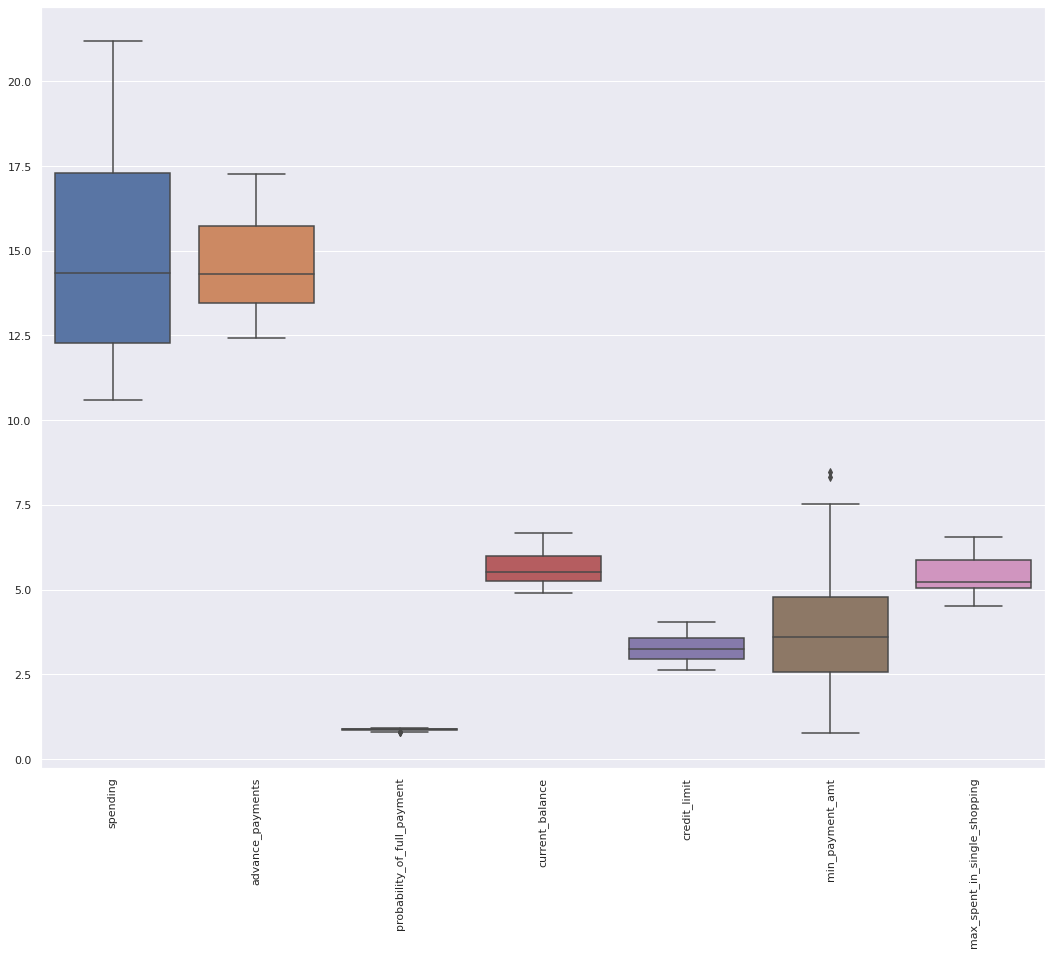

In [13]:
# Checking for Outliers
plt.figure(figsize=(18,14))
box = sns.boxplot(data=data)
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


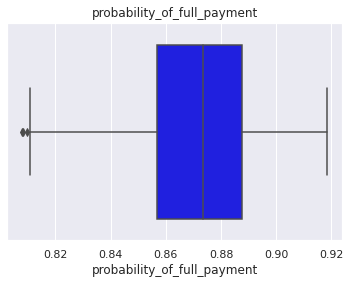

In [14]:
plt.title('probability_of_full_payment')
sns.boxplot(data['probability_of_full_payment'],orient='h',color='blue')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


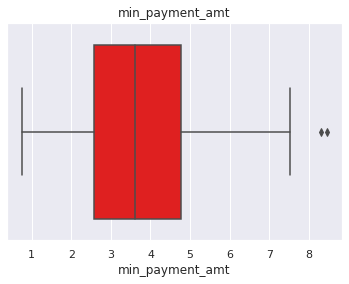

In [16]:
plt.title('min_payment_amt')
sns.boxplot(data['min_payment_amt'],orient='h',color='red')

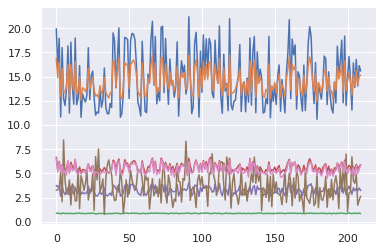

In [17]:
# before scaling plot
plt.plot(data)
plt.show()

In [18]:
#scaling
from scipy.stats import zscore
data_scaled=data.apply(zscore)
data_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


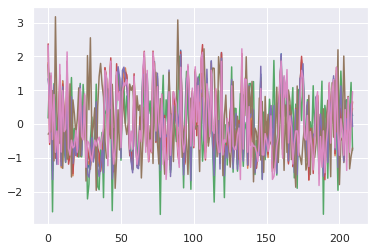

In [19]:
# after scaling plot
plt.plot(data_scaled)
plt.show()

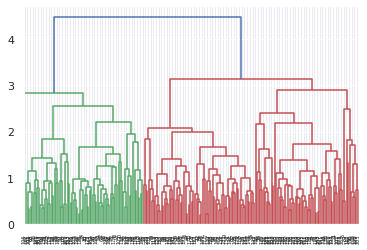

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_method = linkage(data_scaled, method = 'average')
dend = dendrogram(linkage_method)

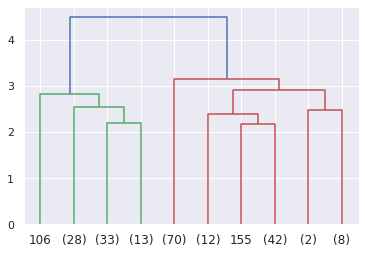

In [21]:
dend1 = dendrogram(linkage_method,
                 truncate_mode='lastp',
                 p = 10)

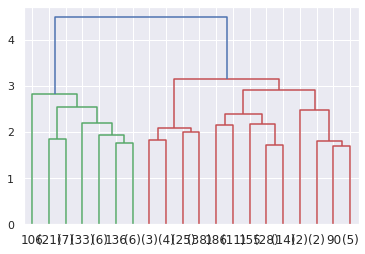

In [22]:
dend2 = dendrogram(linkage_method,
                 truncate_mode='lastp',
                 p = 20)

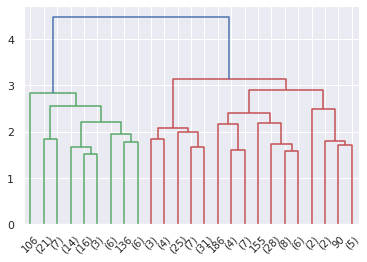

In [24]:
dend3 = dendrogram(linkage_method,
                 truncate_mode='lastp',
                 p = 25)

In [25]:
from scipy.cluster.hierarchy import fcluster
clusters_1 = fcluster(linkage_method, 3, criterion='maxclust')
clusters_1

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [26]:
clusters_data=data.copy()
clusters_data['clusters-1'] = clusters_1
clusters_data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters-1
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [27]:
clusters_data['clusters-1'].value_counts().sort_index()

1    75
2    70
3    65
Name: clusters-1, dtype: int64

In [28]:
mean_data=clusters_data.groupby('clusters-1').mean()
mean_data['Freq']=clusters_data['clusters-1'].value_counts().sort_index()
mean_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters-1,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846766,5.258300,2.846000,4.619000,5.115071,70
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.768418,5.055569,65


In [29]:
from sklearn.cluster import KMeans 
k_means = KMeans(n_clusters = 1)
k_means.fit(data_scaled)
k_means.inertia_

1470.0

In [30]:
k_means = KMeans(n_clusters = 2)
k_means.fit(data_scaled)
k_means.inertia_

659.1717544870407

In [31]:
k_means = KMeans(n_clusters = 3)
k_means.fit(data_scaled)
k_means.inertia_

430.65897315130053

In [32]:
k_means = KMeans(n_clusters = 4)
k_means.fit(data_scaled)
k_means.inertia_

371.2834476674334

In [34]:
wss = []
for i in range(1,11):
        KM = KMeans(n_clusters=i)
        KM.fit(data_scaled)
        wss.append(KM.inertia_)
wss

[1470.0,
 659.1717544870407,
 430.65897315130053,
 371.65314399951626,
 327.05106145316563,
 290.59003059682186,
 262.9396666832541,
 245.01985320749773,
 222.18558154711812,
 204.43340697039045]

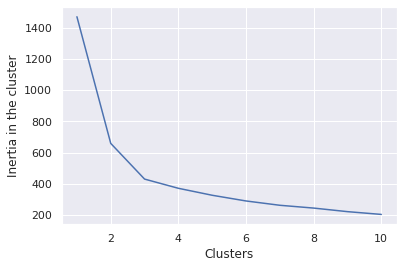

In [35]:
plt.plot(range(1,11), wss)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

In [37]:
k_means_4 = KMeans(n_clusters = 4)
k_means_4.fit(data_scaled)
labels_4 = k_means_4.labels_

In [38]:
kmeans4_data=data.copy()
kmeans4_data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [39]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(data_scaled,labels_4)

0.32732359239831144

In [42]:
from sklearn import metrics
scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(data_scaled)
    scores.append(metrics.silhouette_score(data_scaled, km.labels_))
    
scores

[0.46577247686580914,
 0.4007270552751299,
 0.3291966792017613,
 0.28316654897654814,
 0.2897583830272518,
 0.2694844355168535,
 0.25437316027505635,
 0.2623959398663564,
 0.2673980772529917]

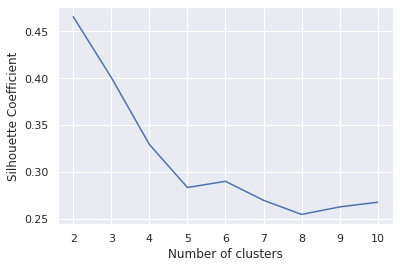

In [43]:
plt.plot(k_range,scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [44]:
#fitting Kmeans
km_3 = KMeans(n_clusters=3,random_state=123)
km_3.fit(data_scaled)
km_3.labels_

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2], dtype=int32)

In [45]:
kmeans_data = data.copy()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_scaled)

#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)

# Adding cluster to the Dataset1
kmeans_data['cluster'] = cluster

#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(kmeans_data.groupby('cluster').mean(),1))
kmeans_mean_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
cluster,,,,,,,
1,18.5,16.2,0.9,6.2,3.7,3.6,6.0
2,11.9,13.2,0.8,5.2,2.8,4.7,5.1
3,14.4,14.3,0.9,5.5,3.3,2.7,5.1


In [46]:
def ClusterPercentage(datafr,name):
    size = pd.Series(datafr[name].value_counts().sort_index())
    percent = pd.Series(round(datafr[name].value_counts()/datafr.shape[0] * 100,2)).sort_index()

    size_df = pd.concat([size, percent],axis=1)
    size_df.columns = ["Cluster_Size","Cluster_Percentage"]
    
    return(size_df)
ClusterPercentage(kmeans_data,"cluster")

,Cluster_Size,Cluster_Percentage
1,67,31.90
2,72,34.29
3,71,33.81


In [47]:
#transposing the cluster
cluster_Transpose = kmeans_mean_cluster.T
cluster_Transpose

cluster,1,2,3
spending,18.5,11.9,14.4
advance_payments,16.2,13.2,14.3
probability_of_full_payment,0.9,0.8,0.9
current_balance,6.2,5.2,5.5
credit_limit,3.7,2.8,3.3
min_payment_amt,3.6,4.7,2.7
max_spent_in_single_shopping,6.0,5.1,5.1
